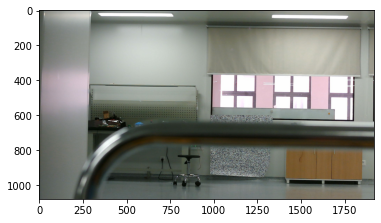

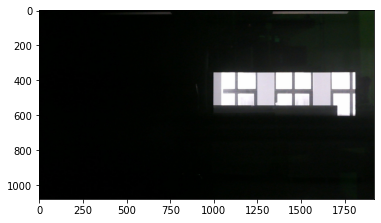

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image1 = mpimg.imread("pic/c1.jpg")
image2 = mpimg.imread("pic/c2.jpg")

plt.figure()
plt.imshow(image1)
plt.savefig('image1.png', dpi = 300)

plt.figure()
plt.imshow(image2)
plt.savefig('image2.png', dpi = 300)

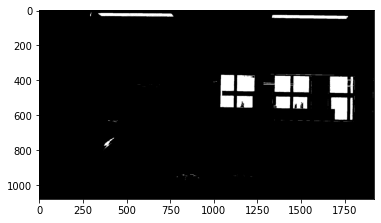

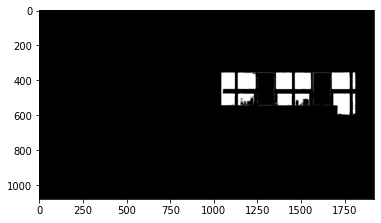

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image1 = mpimg.imread("pic/c1.jpg")
image2 = mpimg.imread("pic/c2.jpg")



import cv2
# 转换成黑白图像
img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

ret, img1 = cv2.threshold(img1, 245, 255,cv2.THRESH_BINARY) # 这里的第二个参数要调，是阈值！！
ret, img2 = cv2.threshold(img2, 245, 255,cv2.THRESH_BINARY) # 这里的第二个参数要调，是阈值！！
plt.figure()
plt.imshow(img1,cmap='gray')
plt.figure()
plt.imshow(img2,cmap='gray')

# 图像配准，获取配准参数

# 对原图像进行处理


特征点提取&生成描述运行时间:0.61秒


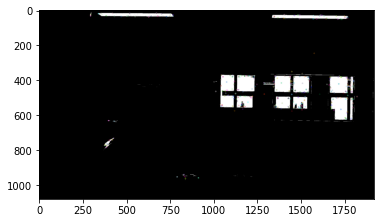

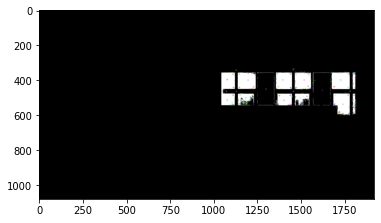

In [14]:
import cv2
import time

#  计算特征点提取&生成描述时间
start = time.time()
sift = cv2.SIFT_create()
#  使用SIFT查找关键点key points和描述符descriptors
image1 = img1
image2 = img2
kp1, des1 = sift.detectAndCompute(image1, None)
kp2, des2 = sift.detectAndCompute(image2, None)
end = time.time()
print("特征点提取&生成描述运行时间:%.2f秒"%(end-start))

kp_image1 = cv2.drawKeypoints(image1, kp1, None)
kp_image2 = cv2.drawKeypoints(image2, kp2, None)

plt.figure()
plt.imshow(kp_image1)
plt.savefig('kp_image1.png', dpi = 300)

plt.figure()
plt.imshow(kp_image2)
plt.savefig('kp_image2.png', dpi = 300)

In [15]:
#  查看关键点
print("关键点数目:", len(kp1))

for i in range(2):
    print("关键点", i)
    print("数据类型:", type(kp1[i]))
    print("关键点坐标:", kp1[i].pt)
    print("邻域直径:", kp1[i].size)
    print("方向:", kp1[i].angle)
    print("所在的图像金字塔的组:", kp1[i].octave)
    print("================")

#  查看描述
print("描述的shape:", des1.shape)
for i in range(2):
    print("描述", i)
    print(des1[i])

关键点数目: 408
关键点 0
数据类型: <class 'cv2.KeyPoint'>
关键点坐标: (295.1604919433594, 30.112642288208008)
邻域直径: 4.348333358764648
方向: 1.808502197265625
所在的图像金字塔的组: 13828352
关键点 1
数据类型: <class 'cv2.KeyPoint'>
关键点坐标: (295.1604919433594, 30.112642288208008)
邻域直径: 4.348333358764648
方向: 189.11959838867188
所在的图像金字塔的组: 13828352
描述的shape: (408, 128)
描述 0
[  7.   0.   0.   0.   0.   0.   0.   3. 104.   0.   0.   0.   5.   3.
   8. 153.  31.   0.   0.  24. 154.  25.  19.  94.   0.   0.   0.  13.
  71.   3.   0.   0.  32.   1.   0.   0.   0.   0.   0.   5. 154.  19.
   1.   5.  37.   5.   3. 106.  63.   6.   2.  55. 154.  12.   6.  35.
   0.   0.   0.  12.  66.   0.   0.   0.  24.   7.   0.   0.   0.   0.
   0.   0. 154. 154.  44.  31.  18.   0.   0.   5.  27.  45.  50. 154.
 154.   0.   0.   1.   0.   0.   0.  10.  32.   0.   0.   0.   1.   2.
   0.   0.   0.   0.   0.   0.   7.  45.  34.   6.   0.   0.   0.   0.
   0.  11.  42.  45.   9.   0.   0.   0.   0.   0.   0.   3.   2.   0.
   0.   0.]
描述 1
[  3.   

匹配点匹配运行时间:0.00秒
匹配对的数目: 168
匹配 0
数据类型: <class 'cv2.DMatch'>
描述符之间的距离: 218.66183471679688
查询图像中描述符的索引: 7
目标图像中描述符的索引: 175
匹配 1
数据类型: <class 'cv2.DMatch'>
描述符之间的距离: 237.47842407226562
查询图像中描述符的索引: 15
目标图像中描述符的索引: 93


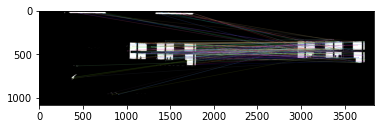

In [16]:
ratio = 0.85

#  计算匹配点匹配时间
start = time.time()

#  K近邻算法求取在空间中距离最近的K个数据点，并将这些数据点归为一类
matcher = cv2.BFMatcher()
raw_matches = matcher.knnMatch(des1, des2, k = 2)
good_matches = []
for m1, m2 in raw_matches:
    #  如果最接近和次接近的比值大于一个既定的值，那么我们保留这个最接近的值，认为它和其匹配的点为good_match
    if m1.distance < ratio * m2.distance:
        good_matches.append([m1])
end = time.time()
print("匹配点匹配运行时间:%.2f秒"%(end-start))

matches = cv2.drawMatchesKnn(image1, kp1, image2, kp2, good_matches, None, flags = 2)

plt.figure()
plt.imshow(matches)
plt.savefig('matches.png', dpi = 300)
#  匹配对的数目
print("匹配对的数目:", len(good_matches))
for i in range(2):
    print("匹配", i)
    print("数据类型:", type(good_matches[i][0]))
    print("描述符之间的距离:", good_matches[i][0].distance)
    print("查询图像中描述符的索引:", good_matches[i][0].queryIdx)
    print("目标图像中描述符的索引:", good_matches[i][0].trainIdx)
    print("================")

匹配运行时间:0.04秒


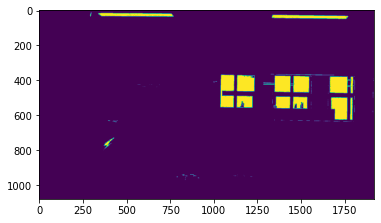

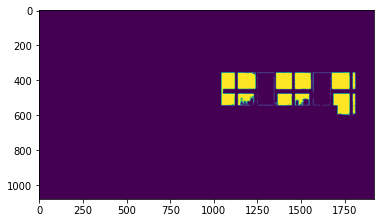

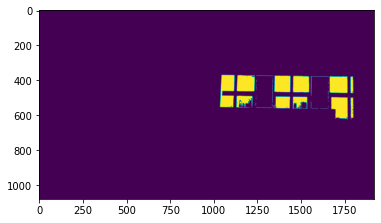

In [17]:
import numpy as np

#  单应性矩阵有八个参数，每一个对应的像素点可以产生2个方程(x一个，y一个)，那么需要四个像素点就能解出单应性矩阵
if len(good_matches) > 4:
    #  计算匹配时间
    start = time.time()
    ptsA= np.float32([kp1[m[0].queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    ptsB = np.float32([kp2[m[0].trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    ransacReprojThreshold = 4
    #  单应性矩阵可以将一张图通过旋转、变换等方式与另一张图对齐
    H, status =cv2.findHomography(ptsA,ptsB,cv2.RANSAC,ransacReprojThreshold);
    imgOut = cv2.warpPerspective(image2, H, (image1.shape[1],image1.shape[0]),flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    end = time.time()
    print("匹配运行时间:%.2f秒"%(end-start))
    
    plt.figure()
    plt.imshow(image1)
    plt.figure()
    plt.imshow(image2)
    plt.figure()
    plt.imshow(imgOut)
    # plt.savefig('imgOut.png', dpi = 300)

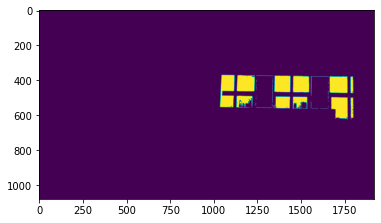

In [18]:
plt.imshow(image1+ imgOut)
plt.imshow(image2)
plt.imshow(imgOut)
# img = image2*255
# plt.imshow(img)

图像有扭曲，实际效果并不好，用简单的位移来计算


In [19]:
# DisplacementPix = [14, -25]
img1 = image1[0:1080-25,14:1920,:]
img2 = image2[25:1080,0:1920-14,:]
plt.imshow(img1)
cv2.imwrite("cut_image1.png",img1)
plt.imshow(img2)
cv2.imwrite("cut_image2.png",img2)

from Pyrometricfunc import pyrometricfunc
T = pyrometricfunc(img1, img2)
plt.imshow(T)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed